In [103]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the Wonderful Wines of the World data

data = pd.read_excel(r'C:\Users\frede\Documents\GitHub\BC1_GroupS\data\WonderfulWinesoftheWorld.xlsx') 
data.drop(['Rand'], axis=1)

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
0,5325.0,653.000,55.0000,20.0000,78473.000,0.0000,0.0000,20.0000,18.0000,826.0000,...,5.0000,0,0,0,0,0,0,0,0,0
1,3956.0,1041.000,75.0000,18.0000,105087.000,0.0000,0.0000,36.0000,33.0000,1852.0000,...,4.0000,0,0,0,1,0,0,0,0,0
2,3681.0,666.000,18.0000,12.0000,27984.000,1.0000,0.0000,4.0000,56.0000,39.0000,...,8.0000,0,0,0,0,0,0,0,0,0
3,2829.0,1049.000,42.0000,16.0000,61748.000,1.0000,1.0000,2.0000,46.0000,37.0000,...,7.0000,0,0,0,0,0,0,0,1,1
4,8788.0,837.000,47.0000,16.0000,65789.000,0.0000,1.0000,2.0000,3.0000,36.0000,...,6.0000,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,4070.0,596.000,66.0000,15.0000,84714.000,0.0000,0.0000,18.0000,45.0000,720.0000,...,2.0000,0,0,0,0,0,0,0,0,0
9997,7909.0,619.000,18.0000,12.0000,40466.000,0.0000,0.0000,3.0000,65.0000,47.0000,...,5.0000,0,0,0,0,0,0,0,0,0
9998,4158.0,1107.000,33.0000,16.0000,53661.000,1.0000,0.0000,1.0000,368.0000,15.0000,...,6.0000,0,0,0,0,0,0,0,0,0
9999,4914.0,979.000,55.0000,16.0000,94926.000,0.0000,1.0000,25.0000,28.0000,1148.0000,...,5.0000,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Kidhome      10001 non-null  float64
 6   Teenhome     10001 non-null  float64
 7   Freq         10001 non-null  float64
 8   Recency      10001 non-null  float64
 9   Monetary     10001 non-null  float64
 10  LTV          10001 non-null  float64
 11  Perdeal      10001 non-null  float64
 12  Dryred       10001 non-null  float64
 13  Sweetred     10001 non-null  float64
 14  Drywh        10001 non-null  float64
 15  Sweetwh      10001 non-null  float64
 16  Dessert      10001 non-null  float64
 17  Exotic       10001 non-null  float64
 18  WebPurchase  10001 non-null  float64
 19  WebV

In [4]:
data.head()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [5]:
len(data.Custid.unique())

10001

In [6]:
data.iloc[:,1:11].describe()

,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,898.102000,47.927300,16.739100,69904.358000,0.418800,0.469800,14.628100,62.406800,622.555200,209.071200
std,202.482664,17.301856,1.876281,27610.852665,0.493363,0.499087,11.968475,69.870762,647.102966,291.971441
min,550.000000,18.000000,12.000000,10000.000000,0.000000,0.000000,1.000000,0.000000,6.000000,-178.000000
25%,724.000000,33.000000,15.000000,47646.000000,0.000000,0.000000,4.000000,26.000000,63.000000,-2.000000
50%,894.000000,48.000000,17.000000,70009.000000,0.000000,0.000000,12.000000,52.000000,383.000000,57.000000
75%,1074.000000,63.000000,18.000000,92147.000000,1.000000,1.000000,24.000000,78.000000,1077.000000,364.000000
max,1250.000000,78.000000,20.000000,140628.000000,1.000000,1.000000,56.000000,549.000000,3052.000000,1791.000000


In [7]:
profile = ProfileReport(data, title='Wonderful Wines of the World Pandas Profiling Report', explorative = True)
profile.to_file(r'C:\Users\frede\Documents\GitHub\BC1_GroupS\analysis\WonderfulWinesProfiling.html')

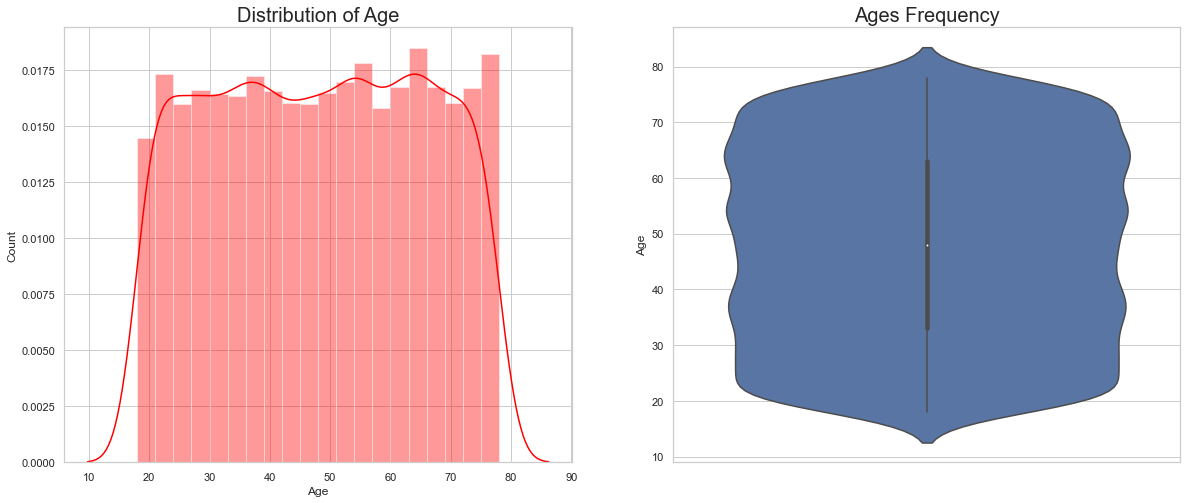

In [25]:
plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], bins = 20,color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.violinplot(y=data["Age"])
plt.title('Ages Frequency', fontsize = 20)
plt.show()

Text(0, 0.5, 'Count')

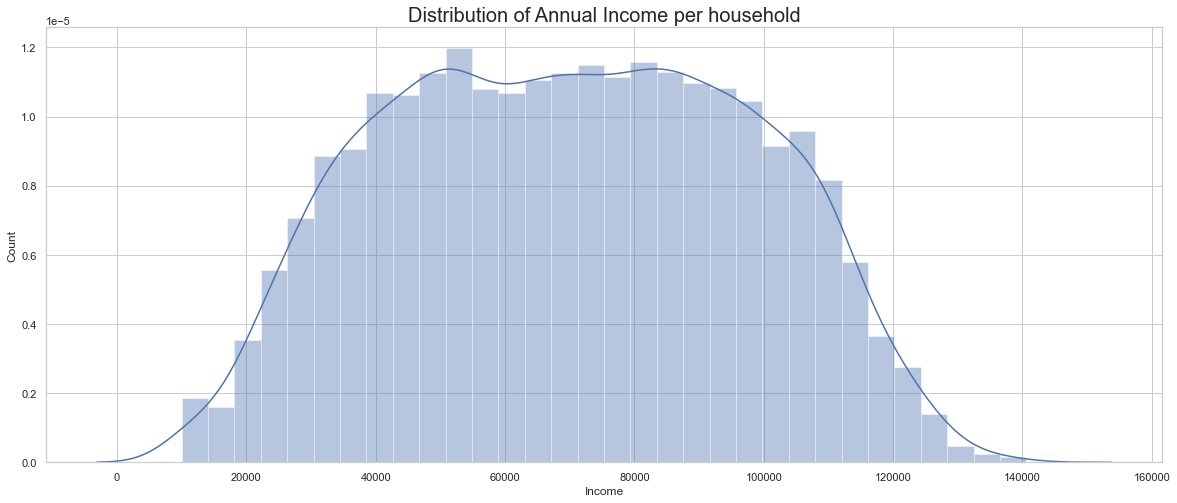

In [27]:
sns.set(style = 'whitegrid')
sns.distplot(data['Income'])
plt.title('Distribution of Annual Income per household', fontsize = 20)
plt.xlabel('Income')
plt.ylabel('Count')

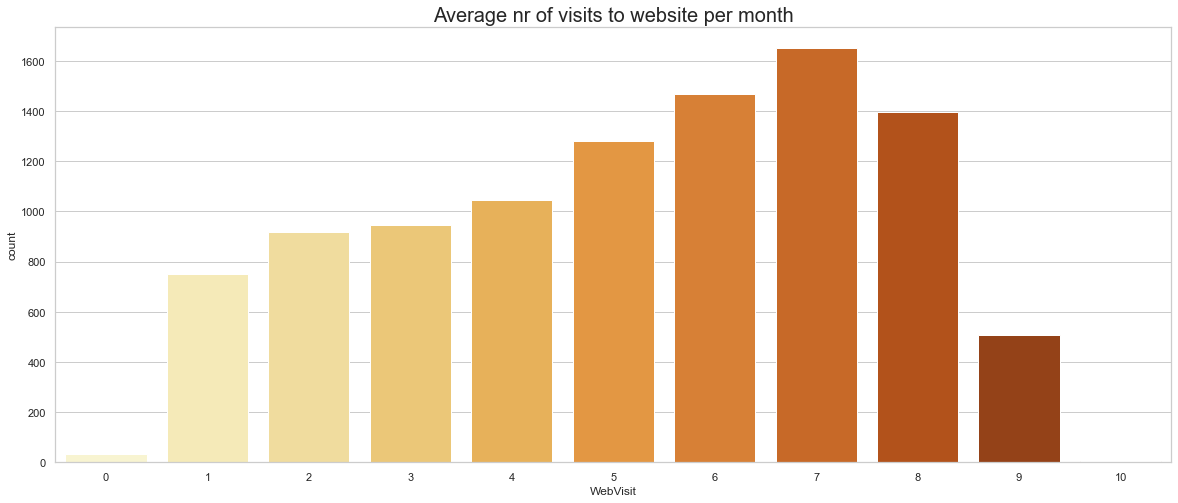

In [10]:
data['WebVisit'] = data['WebVisit'].astype(int)

plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['WebVisit'], palette = 'YlOrBr')
plt.title('Average nr of visits to website per month', fontsize = 20)
plt.show()

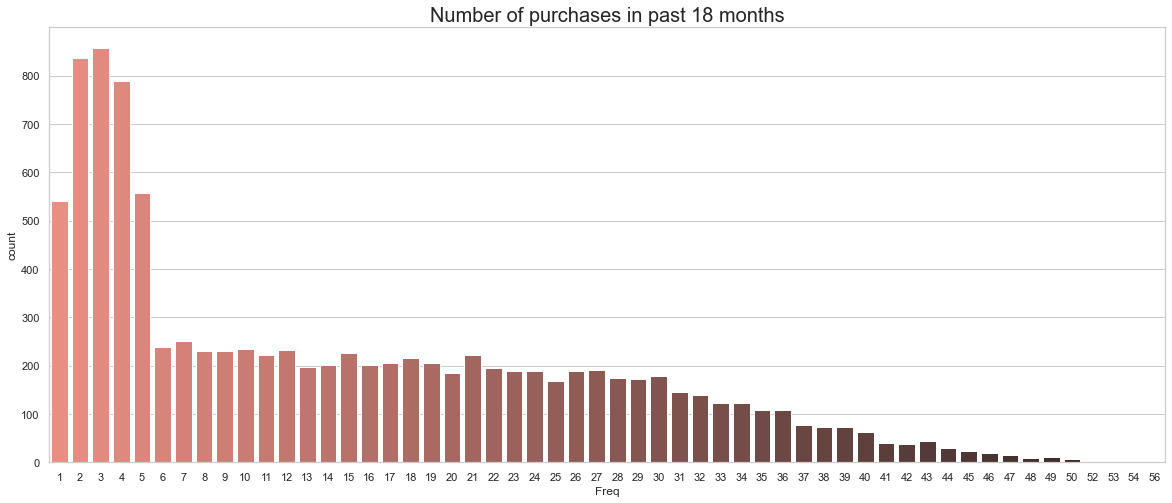

In [11]:
data['Freq'] = data['Freq'].astype(int)

plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Freq'], palette = 'dark:salmon_r')
plt.title('Number of purchases in past 18 months', fontsize = 20)
plt.show()

<AxesSubplot:>

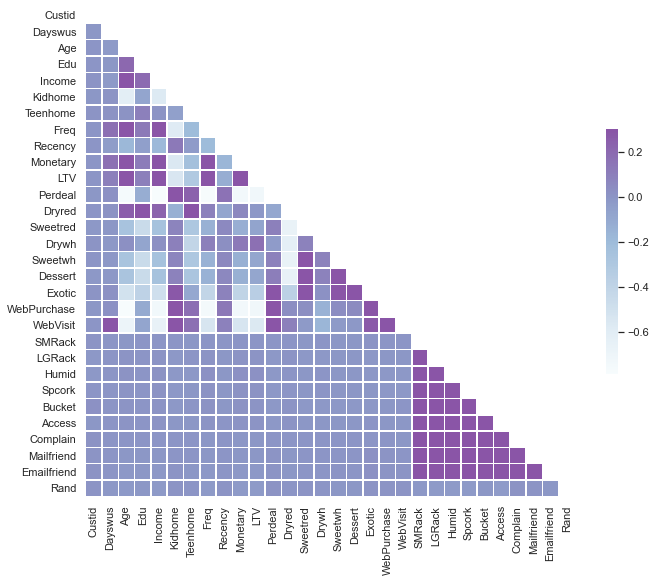

In [113]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("BuPu", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

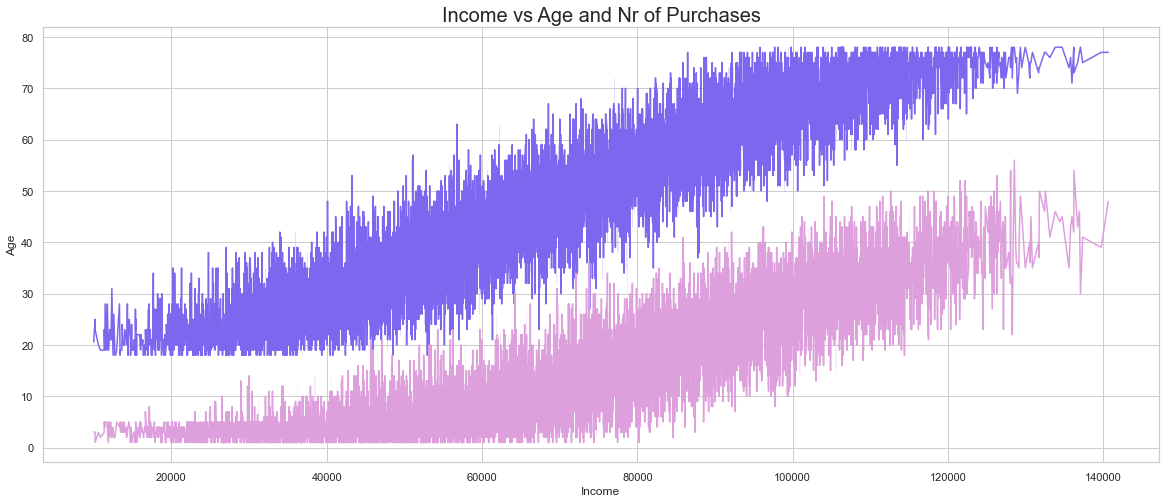

In [31]:
#how Age and the Number of Purchases varies with Annual Income.

x = data['Income']
y = data['Age']
z = data['Freq']

sns.lineplot(x, y, color = 'mediumslateblue')
sns.lineplot(x, z, color = 'plum')
plt.title('Income vs Age and Nr of Purchases', fontsize = 20)
plt.show()

## Data Preparation

In [14]:
data.loc[data.Age < 21]

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
34,4324.0,870.0,20.0,14.0,28393.0,1.0,0.0,1,243.0,13.0,...,0,0,0,0,0,0,0,0,0,0.954484
46,4274.0,655.0,19.0,13.0,33631.0,1.0,0.0,3,36.0,38.0,...,0,0,0,0,0,0,0,0,0,0.922253
75,5172.0,1139.0,20.0,14.0,24036.0,1.0,0.0,4,41.0,89.0,...,0,0,0,0,0,0,0,1,0,0.754229
81,8146.0,1167.0,20.0,14.0,50293.0,1.0,0.0,9,69.0,256.0,...,0,0,0,0,0,0,1,0,0,0.101389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,10042.0,720.0,20.0,14.0,20957.0,1.0,0.0,5,31.0,44.0,...,0,0,0,0,0,0,0,0,0,0.970942
9922,9499.0,974.0,20.0,14.0,10000.0,1.0,0.0,4,31.0,35.0,...,0,0,0,0,0,0,0,0,0,0.600555
9927,4898.0,1091.0,19.0,13.0,56273.0,1.0,0.0,10,42.0,306.0,...,0,0,0,0,0,0,0,0,0,0.715134
9964,5957.0,1217.0,19.0,13.0,18298.0,1.0,0.0,2,43.0,32.0,...,1,0,0,0,0,1,0,1,1,0.931405


In [86]:
# Preserving the original df without variables CustomerId and Rand
data_clean = data.iloc[:,1:29].copy()

# Dropping customers with age under 21 and reindexing
data_clean = data_clean.loc[data.Age >= 21].reset_index(drop=True)

In [88]:
#IQR

q25 = data_clean.quantile(.25)
q75 = data_clean.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

columns = data_clean.columns
filter1 = []
for column in columns:
    llim = lower_lim[column]
    ulim = upper_lim[column]
    filter1.append(data_clean[column].between(llim, ulim, inclusive=True))

filter1 = pd.Series(np.all(filter1, 0))
do1 = data_clean[filter1]
print('Percentage of data kept after removing outliers:', np.round(do1.shape[0] / data_clean.shape[0], 4))

Percentage of data kept after removing outliers: 0.5704


In [90]:
#Z-Score

z_scores = stats.zscore(data_clean)
abs_z_scores = np.abs(z_scores)
filter2 = (abs_z_scores < 3).all(axis=1)
filter2 = pd.Series(filter2)
do2 = data_clean[filter2]
print('Percentage of data kept after removing outliers:', np.round(do2.shape[0] / data_clean.shape[0], 4))

Percentage of data kept after removing outliers: 0.8909


In [95]:
#Combining IQR and Z-Score methods

len(data_clean[(filter2 | filter1)])/len(data_clean)

0.8908748824082785

In [98]:
dataco = do2.copy()
outliers = data_clean[filter2 == False]

In [104]:
#Normalize
names = dataco.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(dataco)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=names) 

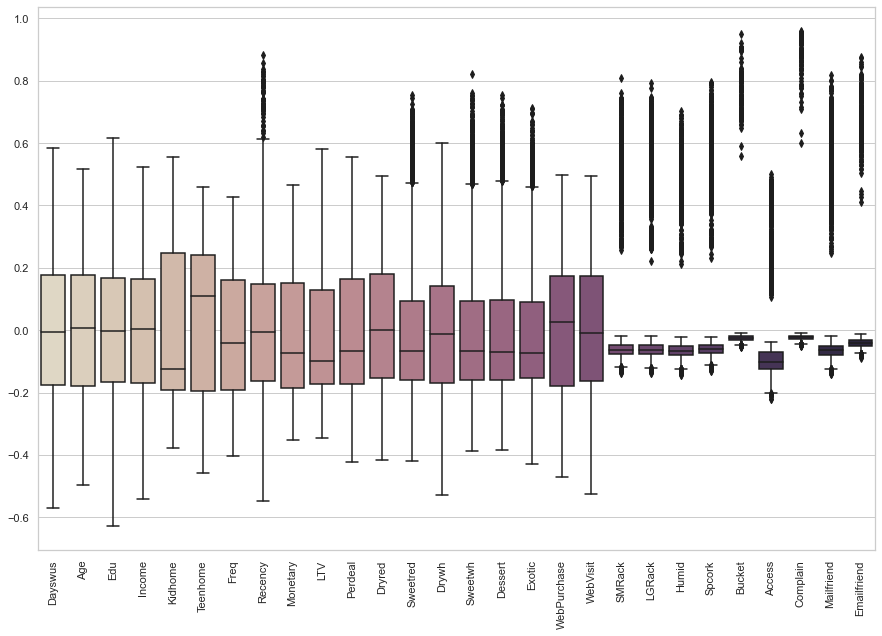

In [125]:
plt.figure(figsize=(15,10))
sns.boxplot(data=normalized_df, palette = 'ch:s=-.2,r=.6')
plt.xticks(rotation=90)
plt.show()

In [116]:
cor = normalized_df.corr()
#Correlation with Total Sales variable
cor_target = abs(cor["Monetary"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

Monetary       1.000000
Freq           0.991601
LTV            0.918881
Income         0.799618
Age            0.747181
Perdeal        0.682830
WebPurchase    0.653314
Name: Monetary, dtype: float64